# test 

In [3]:
import pandas as pd
import re

# Load the dataset
file_path = "data/CeraVe_reddit_cleaned_non-e_data_V3.csv"  
df = pd.read_csv(file_path)

# Function to check if a string contains non-English characters
def contains_non_english(text):
    if pd.isna(text):  # Handle NaN values
        return False
    return bool(re.search(r'[^a-zA-Z0-9\s\.,!?\'\"-]', str(text)))

# Dictionary to store results
non_english_counts = {}
total_counts = len(df)

# Analyze each column
for column in df.columns:
    non_english_counts[column] = df[column].astype(str).apply(contains_non_english).sum()

# Convert results to percentage
non_english_percentage = {col: (count / total_counts) * 100 for col, count in non_english_counts.items()}

# Print results
print("Non-English Character Analysis")
for column, percentage in non_english_percentage.items():
    print(f"{column}: {percentage:.2f}% of entries contain non-English characters.")

Non-English Character Analysis
title: 40.74% of entries contain non-English characters.
text: 52.86% of entries contain non-English characters.
upvotes: 0.00% of entries contain non-English characters.
comments: 41.65% of entries contain non-English characters.
timestamp: 100.00% of entries contain non-English characters.
url: 100.00% of entries contain non-English characters.
subreddit: 16.48% of entries contain non-English characters.
keyword: 0.00% of entries contain non-English characters.


# Preprocess

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


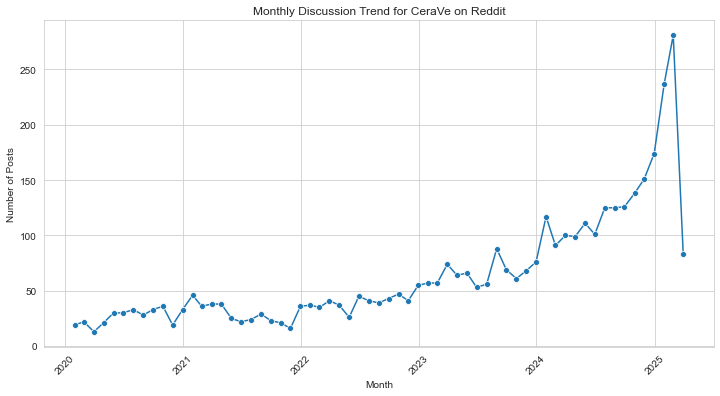

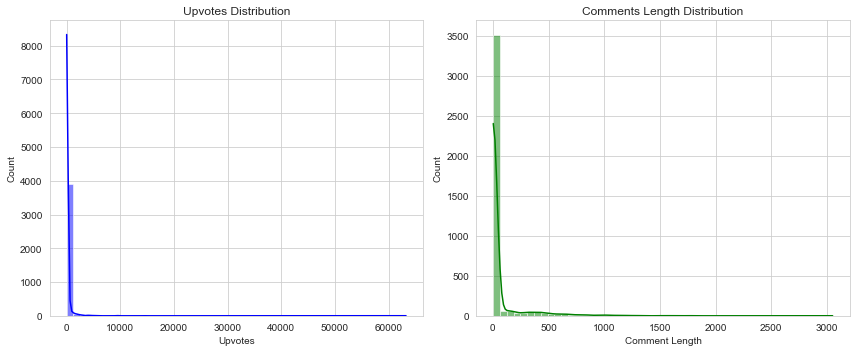

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'SkincareAddiction'),
  Text(0, 1, 'Skincare_Addiction'),
  Text(0, 2, 'SkincareAddicts'),
  Text(0, 3, 'beauty'),
  Text(0, 4, 'beautytalkph'),
  Text(0, 5, 'TheOrdinarySkincare'),
  Text(0, 6, 'makeup'),
  Text(0, 7, 'MakeupAddiction')])

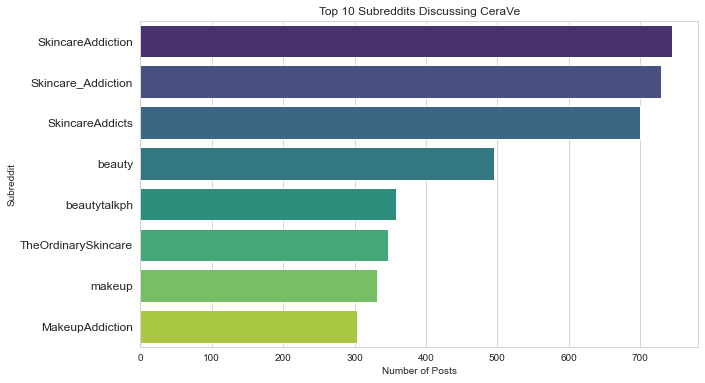

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "data/CeraVe_reddit_filtered_last_5_years.csv"
df = pd.read_csv(file_path)

# 
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# 
sns.set_style("whitegrid")

# 
df_trend = df.set_index('timestamp').resample('M').count()['title']

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_trend.index, y=df_trend.values, marker='o')
plt.title("Monthly Discussion Trend for CeraVe on Reddit")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.show()

# 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['upvotes'], bins=50, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Upvotes Distribution")
axes[0].set_xlabel("Upvotes")
axes[0].set_ylabel("Count")

sns.histplot(df['comments'].astype(str).str.len(), bins=50, kde=True, ax=axes[1], color='green')
axes[1].set_title("Comments Length Distribution")
axes[1].set_xlabel("Comment Length")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# subreddit
subreddit_counts = df['subreddit'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=subreddit_counts.values, y=subreddit_counts.index, palette='viridis')
plt.title("Top 10 Subreddits Discussing CeraVe")
plt.xlabel("Number of Posts")
plt.ylabel
plt.ylabel("Subreddit")
plt.yticks(fontsize=12) 


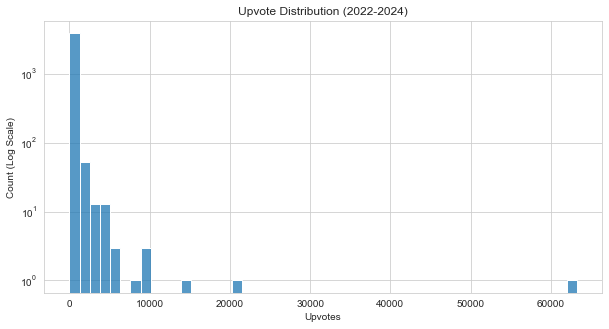

                                               title  \
0               [acne] A year after stopping Cerave    
1             [Review] CeraVe products love or hate?   
2  [B&A] A week ago I discovered this sub and dis...   
3  For all you CeraVe haters, what did CeraVe do ...   
4  [Product Question] Are Cerave products still w...   

                                                text  upvotes comments  \
0                                                NaN     2367      NaN   
1                                                NaN      304      NaN   
2                                                NaN      449      NaN   
3  Personally, I’m looking for a simple cleanser ...      324      NaN   
4                                                NaN        3      NaN   

            timestamp                                                url  \
0 2025-01-11 15:55:49             https://www.reddit.com/gallery/1hyyu6o   
1 2022-11-11 17:38:29                https://i.redd.it/p0du4i5sycz

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace with your actual file path)
file_path = "data/CeraVe_reddit_filtered_last_5_years.csv"  
df = pd.read_csv(file_path)

# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])


# Check the distribution of upvotes
plt.figure(figsize=(10, 5))
sns.histplot(df['upvotes'], bins=50, log_scale=(False, True))  
plt.xlabel("Upvotes")
plt.ylabel("Count (Log Scale)")
plt.title("Upvote Distribution (2022-2024)")
plt.show()

# If distribution is highly skewed, apply log transformation
df['log_upvotes'] = np.log1p(df['upvotes'])  

print(df.head())


In [3]:
# Define numerical encoding for popularity categories
def categorize_popularity(upvotes):
    if upvotes <= df['upvotes'].quantile(0.25):
        return 0  # Low Engagement
    elif upvotes <= df['upvotes'].quantile(0.75):
        return 1  # Moderate Engagement
    elif upvotes <= df['upvotes'].quantile(0.95):
        return 2  # High Engagement
    else:
        return 3  # Viral

# Apply the function to create a new column
df['popularity_category'] = df['upvotes'].apply(categorize_popularity)

# Check distribution of popularity levels
popularity_counts = df['popularity_category'].value_counts()
print(popularity_counts)

print(df.head())

df.to_csv("data/CeraVe_reddit_filtered_with_popularity_numeric.csv", index=False)



1    1722
0    1284
2     799
3     201
Name: popularity_category, dtype: int64
                                               title  \
0               [acne] A year after stopping Cerave    
1             [Review] CeraVe products love or hate?   
2  [B&A] A week ago I discovered this sub and dis...   
3  For all you CeraVe haters, what did CeraVe do ...   
4  [Product Question] Are Cerave products still w...   

                                                text  upvotes comments  \
0                                                NaN     2367      NaN   
1                                                NaN      304      NaN   
2                                                NaN      449      NaN   
3  Personally, I’m looking for a simple cleanser ...      324      NaN   
4                                                NaN        3      NaN   

            timestamp                                                url  \
0 2025-01-11 15:55:49             https://www.reddit.com/galle

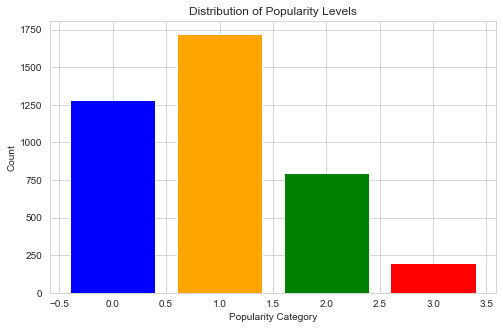

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Plot the distribution of popularity levels
plt.figure(figsize=(8, 5))
popularity_counts = df['popularity_category'].value_counts().sort_index()

plt.bar(popularity_counts.index, popularity_counts.values, color=["blue", "orange", "green", "red"])
plt.xlabel("Popularity Category")
plt.ylabel("Count")
plt.title("Distribution of Popularity Levels")
plt.xticks(rotation=0)

plt.show()
